# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
import pandas as pd
import math
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [2]:
df1 = pd.read_csv("ad_data.csv")
df2  = pd.read_csv("customer_data.csv")

df = pd.merge(df1, df2, on='customer_id', how='left')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   ad_type           10000 non-null  object 
 2   ad_medium         10000 non-null  object 
 3   ad_response       10000 non-null  bool   
 4   items_purchased   10000 non-null  object 
 5   drinks_purchased  10000 non-null  object 
 6   state             10000 non-null  object 
 7   sex               10000 non-null  object 
 8   age               10000 non-null  float64
 9   occupation        10000 non-null  object 
 10  family_size       10000 non-null  int64  
 11  income            10000 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 947.3+ KB


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

In [4]:
#This is the encoding for regions!

northeast = ['NH', 'VT', 'RI', 'CT', 'MA', 'NY', 'NJ', 'PA', 'DE', 'MD', 'ME']
midWest = ['OH', 'MI', 'WI', 'IN', 'IL', 'MO', 'MN', 'IA', 'KS', 'NE', 'ND', 'SD']
west = ['AZ', 'CO', 'ID', 'MT', 'NV', 'UT', 'WY', 'WA', 'OR', 'CA', 'AK', 'HI', 'NM']
south = ['DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV', 'AR', 'AL']


df['region'] = 0  #This is the new column.
df.loc[df['state'].isin(northeast), 'region'] = 1
df.loc[df['state'].isin(midWest), 'region'] = 2
df.loc[df['state'].isin(west), 'region'] = 3
df.loc[df['state'].isin(south), 'region'] = 4

In [5]:
df['medium_code'] = 0  #Another new column!

youtube = ["15 sec YouTube ad"]      #Variables
hulu = ["30 sec Hulu commercial"]
instagram = ["Instagram photo ad"]
cable = ["30 sec cable TV ad"]
facebook = ["Static Facebook ad"]
newspaper = ["Newspaper ad"]
tiktok = ["15 sec TikTok ad"]

#This is the encoding for the type of medium because why not.

df.loc[df['ad_medium'].isin(youtube), 'medium_code'] = 1
df.loc[df['ad_medium'].isin(hulu), 'medium_code'] = 2
df.loc[df['ad_medium'].isin(instagram), 'medium_code'] = 3
df.loc[df['ad_medium'].isin(cable), 'medium_code'] = 4
df.loc[df['ad_medium'].isin(facebook), 'medium_code'] = 5
df.loc[df['ad_medium'].isin(newspaper), 'medium_code'] = 6
df.loc[df['ad_medium'].isin(tiktok), 'medium_code'] = 7

In [9]:
#This was actually much faster to do...
occupation_mapping = {
    "Retail": 1,
    "Government": 2,
    "Healthcare": 3,
    "Food Service": 4,
    "Education": 5,
    "Other": 6,
    "IT": 7,
    "Unemployed": 8,
    "Student": 9,
    "Retired": 11
}

df["occu_code"] = df["occupation"].map(occupation_mapping).fillna(0).astype(int)


In [11]:
ad_type_encoding = {
    'BOGO - Garlic Steak Nacho Fries': 1,
    'DISCOUNT-50%': 2,
    'REWARD - Free Garlic Steak Nacho Fries with purchase of $20 or more': 3,
    'DISCOUNT-5%': 4,
    'DISCOUNT-10%': 5,
    'BOGO - Baja Blast': 6,
    'REWARD - Free Baja Blast with purchase of $20 or more': 7,
    'DISCOUNT-20%': 8
}

df['ad_type_enco'] = df["ad_type"].map(ad_type_encoding).fillna(0).astype(int)

In [18]:
taco_df, _ = train_test_split(df, test_size=0.2, random_state=42)
taco_df = taco_df[['income', 'age', 'family_size', 'region', 'medium_code', 'ad_type_enco']]

#taco_df.info()

#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [19]:
# Test model here.

In [31]:
model = KMeans(n_clusters = 6)

In [32]:
model.fit(taco_df)

KMeans(n_clusters=6)

In [33]:
sil_score = silhouette_score(taco_df, model.labels_)

In [34]:
sil_score

0.6053671631580544

In [35]:
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(taco_df)
    sse.append(kmeans.inertia_)

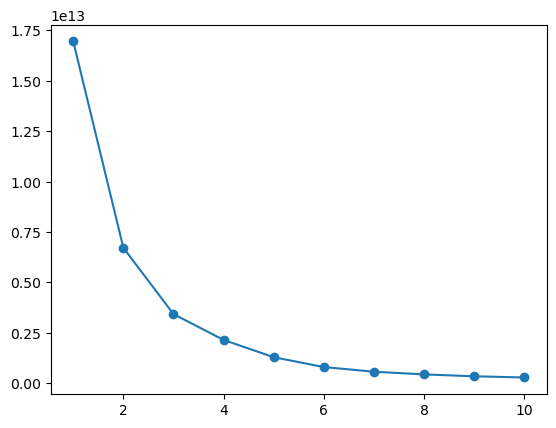

In [36]:
plt.plot(k_range, sse, marker='o')

In [26]:
model.cluster_centers_


array([[4.06618419e+04, 3.60049917e+01, 1.75806988e+00, 2.81397671e+00,
        2.78668885e+00, 4.51813644e+00],
       [1.52886402e+05, 4.82439024e+01, 2.20075047e+00, 2.78236398e+00,
        3.28142589e+00, 4.51219512e+00],
       [1.02883390e+05, 4.20176380e+01, 2.02990798e+00, 2.78220859e+00,
        2.70092025e+00, 4.52147239e+00],
       [2.36218874e+05, 5.64371585e+01, 2.36612022e+00, 3.04371585e+00,
        3.90163934e+00, 4.32240437e+00],
       [5.16775149e+03, 4.09500595e+01, 2.16052319e+00, 3.19738407e+00,
        3.92865636e+00, 4.31034483e+00],
       [6.91821832e+04, 3.49639175e+01, 1.76710403e+00, 2.82099344e+00,
        2.67713215e+00, 4.50281162e+00]])

In [37]:
# 'income', 'age', 'family_size', 'region', 'medium_code', 'ad_type_enco'

### 1st Cluster: Person makes 40k a year at the age of 36 with only a family of 2. They live in the west and saw a 10% discount ad while scrolling through Instragram.

### 2nd Cluster: 150,000k income at the age of 45 with a family of 2. Lives in the west and saw a static image of a 10% discount ad through Instagram.

### 3rd Cluster: 102,000k income at the age of 42 with a family of 2 who also live in the west. Again, they saw a 10% discount ad in Instragram.

### 4th Cluster: 236,000k income at the age of 56 with a family of 2(again). They live in the west(yeah), BUT, saw a 30 second tv ad through cable, which promoted a 5% discount ad.

#### Interpret your elbow plot and/or silhouette score here.

### The silhouette score is of 0.6, which means it is pretty decent at clustering since it is closer to 1 than 0.

### This elbow plot shows that the elbow is around 3 clusters, but that isn't that usefull. If we used 3 clusters, the silhouette score drops to 0.565, meanwhile, with 6 clusters is reached 0.6. Even so, using the 3 clusters would still result in a somewant acceptable silhouette score.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.
### Cluster #3, this person makes around 100k a year at the age of 42, which seems to be common with other clusters. They live in the west region and the| type of ad this person saw was a static image through Instagram of a 10% discount deal.

#### Link your ad here.